# <span style="background-color: lightcyan;">Brain Tumor Imaging Classification for Early Detection</span>

[Problem Identification](#Problem-Identification)- In this step I explain what the problem is and what the process to solve the problesm is. 

[Data Wrangling](#Data-Wrangling) - In this step I loaded te data and familiarized myself with it. This helped me identify issues I could face when dealing with the data.  I performed several preprocessing techniques, including standardization, resizing, normalization, and contrast enhancements. Additionally, I conducted a metadata analysis to assess the structure and integrity of the dataset, ensuring its readiness for exploratory and modeling tasks.

[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))- In this step I vizualised data characteristics to further understand the images and data features Im dealing with. 



## Problem Identification

**<span style="color: lightcoral;">Problem Identification</span>**


The client, NeuroScan Diagnostics, is a leading healthcare provider specializing in medical imaging and early disease detection. One of the biggest challenges in brain tumor diagnosis is the accurate and timely classification of tumors based on MRI scans. Misclassification or delayed detection can lead to incorrect treatment plans, increasing risks for patients.
To address this, NeuroScan Diagnostics seeks to implement an AI-powered deep learning model capable of identifying glioma tumors, meningioma tumors, pituitary tumors, or no tumor based on brain images. By integrating a robust classification system, the organization aims to support radiologists with automated tumor detection, improving diagnostic precision and reducing manual workload. A reliable deep learning model must be developed and deployed by the end of the fiscal year to ensure readiness for clinical validation and real world applications.



## Data Wrangling & Pre-Processing

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import random


add original images before tweaks 

**<span style="color: lightcoral;">Standardize</span>**: image sizes to maintain uniformity across the dataset.

**<span style="color: lightcoral;">Resizing</span>** : Adjust images to a fixed size for model compatibility.

**<span style="color: lightcoral;">Normalization</span>**: Scale pixel values (e.g., between 0 and 1) to improve model performance.

**<span style="color: lightcoral;">Contrast Enhancement</span>**: Apply techniques like histogram equalization to improve visibility.

**<span style="color: lightcoral;">Metadata Analysis</span>**: Check image formats, dimensions, and color channels.




In [2]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']



In [3]:
X_train = []
y_train = []

image_size = 224
for i in labels:
    folderPath = os.path.join('dataset_extracted/Tumor Data', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size, image_size))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)  # Apply CLAHE for controlled contrast enhancement
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        X_train.append(img)
        y_train.append(i)

100%|██████████| 827/827 [00:01<00:00, 816.90it/s]


In [4]:
X_test = []
y_test = []

for i in labels:
    folderPath = os.path.join('dataset_extracted/Tumor Data', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size, image_size))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)  # Apply CLAHE for controlled contrast enhancement
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        X_test.append(img)
        y_test.append(i)

100%|██████████| 74/74 [00:00<00:00, 516.26it/s]


In these two cells the trainign data and testing data where extracted, standardised, resized and normalized for bettere accuracy trainig of the model. 

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test =  np.array(y_test)

Here the training and testing lists are turned into NumPy arrays because deep learning models, like CNNs that I'll be using , work with numerical tensors not lists or raw images.



## Exploratory Data Analysis (EDA)

**<span style="color: lightcoral;"> Data Quality Assessment</span>**

- To begin EDA I will do a **Visual Inspection** and display random images from the training and testing data. They both look great. I dont see any anomalities. 

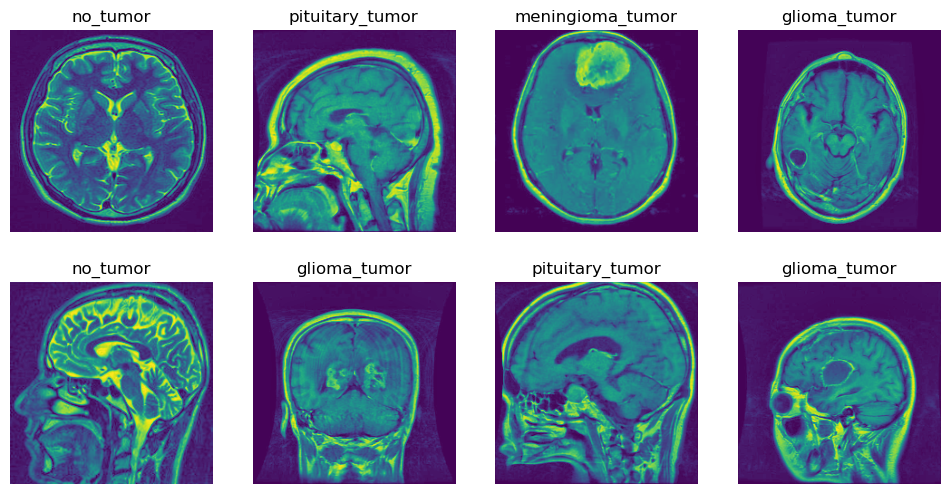

In [6]:
# Define how many images to display
num_images = 8
indices = np.random.choice(len(X_train), num_images, replace=False)

# Plot images
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i+1)  # Arrange in a 2-row, 4-column grid
    plt.imshow(X_train[idx])
    plt.title(y_train[idx])  # Display the corresponding label
    plt.axis('off')

plt.show()


Here I'm just taking a look at how my images are looking so I can Porceed with new techniques. 

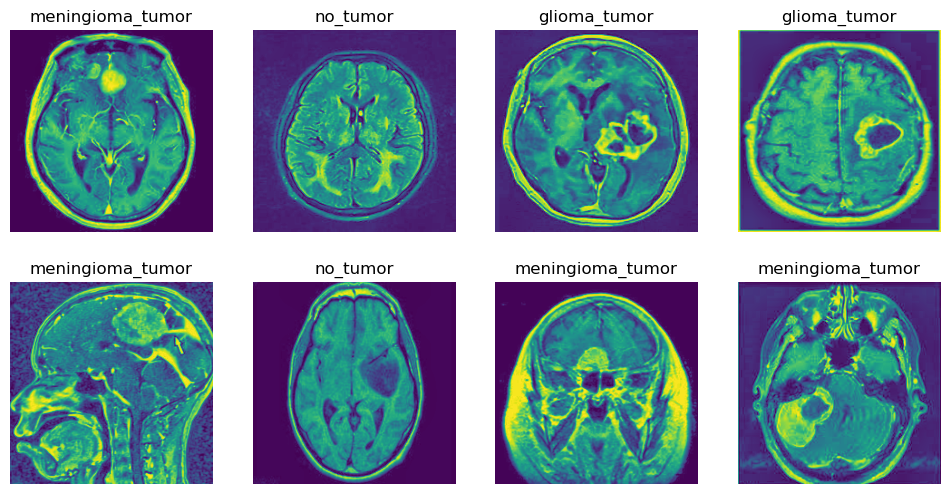

In [7]:
# Define how many images to display
num_images = 8
indices_2 = np.random.choice(len(X_test), num_images, replace=False)

# Plot images
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices_2):
    plt.subplot(2, 4, i+1)  # Arrange in a 2-row, 4-column grid
    plt.imshow(X_test[idx])
    plt.title(y_test[idx])  # Display the corresponding label
    plt.axis('off')

plt.show()



**<span style="color: lightcoral;">Image Count Per Class</span>**: Ensure balanced class distribution to avoid bias.



In [8]:
X_train.shape

(3310, 224, 224)

In [9]:
y_train.shape

(3310,)

In [10]:
y_train_df =  pd.DataFrame(y_train)
y_train_df.head()

,0
0,glioma_tumor
1,glioma_tumor
2,glioma_tumor
3,glioma_tumor
4,glioma_tumor


In [11]:
y_train_df.value_counts()

0               
no_tumor            835
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
Name: count, dtype: int64

The dataset shows to be quite balanced! I do not need to balance the dataset because all categories fall in the same range. 

In [12]:
X_test.shape

(394, 224, 224)

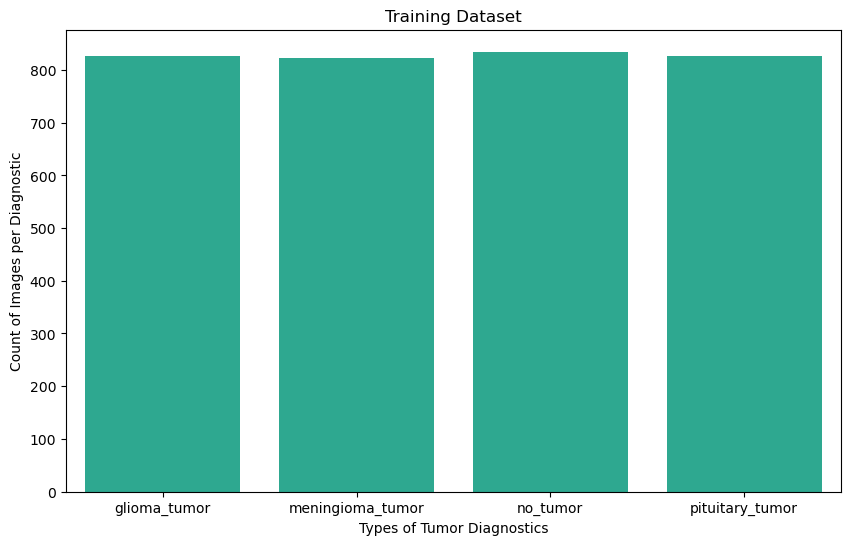

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(x = y_train_df.iloc[:,0], color='#1abc9c')
plt.xlabel("Types of Tumor Diagnostics")
plt.ylabel("Count of Images per Diagnostic")
plt.title("Training Dataset")
plt.show()

**<span style="color: lightcoral;">Bar Chart of Class Frequencies</span>**: Identify underrepresented categories.


In [14]:
y_test.shape

(394,)

In [15]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,0
0,glioma_tumor
1,glioma_tumor
2,glioma_tumor
3,glioma_tumor
4,glioma_tumor


In [16]:
y_test_df.value_counts()

0               
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: count, dtype: int64

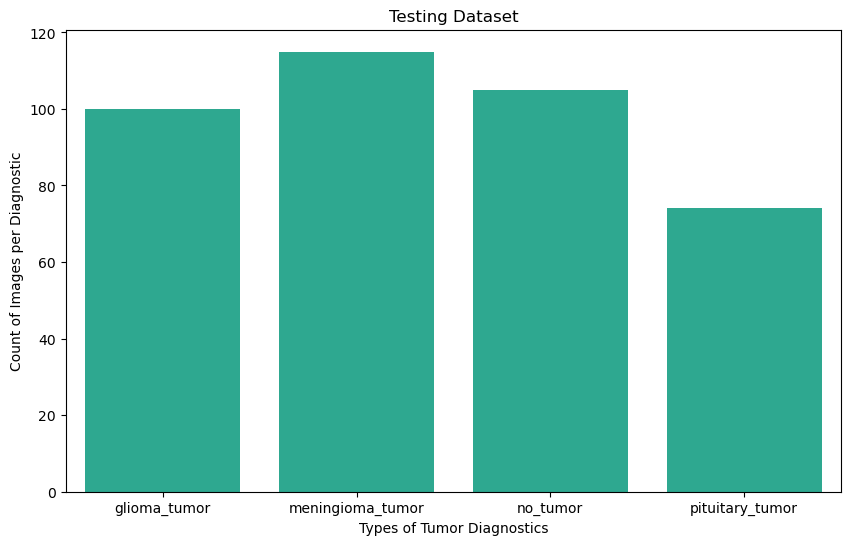

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = y_test_df.iloc[:,0], color='#1abc9c')
plt.xlabel("Types of Tumor Diagnostics")
plt.ylabel("Count of Images per Diagnostic")
plt.title("Testing Dataset")
plt.show()

The testing data on the otherhand is quite unbalanced. Evaluation techniques like precision, recall, and F1-score, because they account for class imbalance.

**<span style="color: lightcoral;">Color & Pixel Distribution</span>**

**<span style="color: lightcoral;">Heatmaps</span>**: Visualize pixel intensity variations across images.

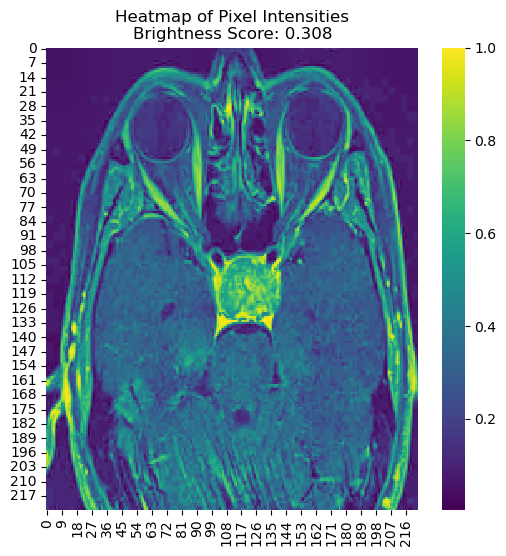

In [18]:
random_img = random.choice(X_train)

# Compute brightness score
brightness_score = np.mean(random_img)  # Average pixel intensity (0-1 scaled)

# Display heatmap
plt.figure(figsize=(6,6))
sns.heatmap(random_img, cmap="viridis")
plt.title(f"Heatmap of Pixel Intensities\nBrightness Score: {brightness_score:.3f}")
plt.show()



Every time this cell is executed it will run a picture with its brightness score. Higher brightness scores mean theres a higher chance of a tumor being present. 

**<span style="color: lightcoral;">Prepare Images (X data) as 3-channel RGB</span>**

The models Ill be using require for the image data they are fed to be 3 color channels and the images are curently 1. 


In [19]:
X_train_rgb = np.stack([X_train]*3, axis=-1)
X_test_rgb = np.stack([X_test]*3, axis=-1)


In [20]:
X_train_rgb.shape

(3310, 224, 224, 3)

In [21]:
X_test_rgb.shape

(394, 224, 224, 3)

**<span style="color: lightcoral;">Transform labeled data (y data) into numerical</span>**


In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [23]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_encoded, num_classes=4)

y_test_cat = to_categorical(y_test_encoded, num_classes=4)

In [24]:
print(label_encoder.classes_)


['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


## Model Selection & Training

**<span style="color: lightcoral;">ResNet</span>**


In [25]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
res_net_model = ResNet50(include_top =False, weights = 'imagenet', 
                        input_shape=(224,224,3))
res_net_model.trainable = False
x = res_net_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.25)(x)
output = Dense(4, activation='softmax')(x)

model_res_net = Model(inputs=res_net_model.input, outputs=output)



In [27]:
model_res_net.compile(
    optimizer='adam',
   loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
history = model_res_net.fit(
    X_train_rgb, y_train_cat, 
    epochs=10,
    batch_size=32
)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 38s 332ms/step - accuracy: 0.2846 - loss: 1.6279
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.3769 - loss: 1.2994
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.4326 - loss: 1.2129
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.4822 - loss: 1.1731
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 332ms/step - accuracy: 0.5003 - loss: 1.1204
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 337ms/step - accuracy: 0.5483 - loss: 1.0726
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.5447 - loss: 1.0468
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.5329 - loss: 1.0543
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.5357 - loss: 1.0232
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.5822 - loss: 0.9935


Training Accuracy
This is what you already get during .fit()—it shows how well the model is doing on the data it's seen. It’s good for monitoring learning progress and checking for overfitting

tunning: change the layers to dense and then dropout instead

So far I see the model performed extremely bad. Best accuracy I have is 57 when Im aiming for 85%

**<span style="color: lightcoral;">MobileNetV2</span>**


In [29]:
from tensorflow.keras.applications import MobileNetV2

In [30]:
mobile = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling= 'avg'
)

In [31]:
x2 = mobile.output
x2= Dense(64, activation = 'relu')(x2)
x2 = Dropout(0.5)(x2)
output_2 = Dense(4, activation='softmax')(x2)

model_mobile= Model(inputs = mobile.input, outputs =output_2 )

In [32]:
model_mobile.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model_history = model_mobile.fit(
    X_train_rgb, y_train_cat,
    epochs=10,
    batch_size=32
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 68s 540ms/step - accuracy: 0.7761 - loss: 0.6124
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 541ms/step - accuracy: 0.8927 - loss: 0.3427
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 535ms/step - accuracy: 0.9283 - loss: 0.2355
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 543ms/step - accuracy: 0.9500 - loss: 0.1524
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 536ms/step - accuracy: 0.9513 - loss: 0.1344
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 534ms/step - accuracy: 0.9567 - loss: 0.1536
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 56s 537ms/step - accuracy: 0.9672 - loss: 0.1170
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 57s 543ms/step - accuracy: 0.9627 - loss: 0.1155
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 59s 564ms/step - accuracy: 0.9799 - loss: 0.0665
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 57s 551ms/step - accuracy: 0.9712 - loss: 0.1246



Overfitting alert: Did you train too long or build a model too powerful for the size of your dataset?

Data leakage: Are your validation and training sets too similar—or worse, overlapping?

Too easy a task: Are the classes extremely distinct or unbalanced?

**<span style="color: lightcoral;">DenseNet121</span>**



In [34]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

# Load the DenseNet121 base model without the top classifier
dense_model = DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

# Unfreeze base model to allow fine-tuning
dense_model.trainable = True

# Build your custom classification head
x3 = dense_model.output
x3 = layers.Dense(64, activation='relu')(x3)
x3 = layers.Dropout(0.5)(x3)
outputs_3 = layers.Dense(4, activation='softmax')(x3)

model_densenet = models.Model(inputs=dense_model.input, outputs=outputs_3)

# Compile the model
model_densenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
model_densenet_history = model_densenet.fit(
    X_train_rgb, y_train_cat,
    epochs=10,
    batch_size=32,
    shuffle=True
)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.7239 - loss: 0.7746
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8895 - loss: 0.3445
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9138 - loss: 0.2645
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9278 - loss: 0.2456
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9133 - loss: 0.2364
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9448 - loss: 0.1800
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9649 - loss: 0.1152
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9428 - loss: 0.1715
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9523 - loss: 0.1379
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9783 - loss: 0.0676


**Making Predictions for All Models**

In [36]:
def predictions(model, train_data):
    probs = model.predict(train_data)
    return np.argmax(probs, axis=1)  # Return encoded labels directly

    

In [37]:
ResNet_pred = predictions(model_res_net, X_train_rgb)
ResNet_pred

104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 380ms/step


array([0, 0, 0, ..., 3, 3, 3], dtype=int64)

In [38]:
np.unique(ResNet_pred)

array([0, 1, 2, 3], dtype=int64)

In [39]:
ResNet_pred.shape

(3310,)

In [40]:
MobileNetV_pred = predictions(model_mobile, X_train_rgb )
MobileNetV_pred

104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
np.unique(MobileNetV_pred)

array([1], dtype=int64)

In [42]:
MobileNetV_pred.shape

(3310,)

In [43]:
model_densene_pred =predictions(model_densenet, X_train_rgb)

104/104 ━━━━━━━━━━━━━━━━━━━━ 44s 403ms/step


In [44]:
np.unique(model_densene_pred)

array([0, 1, 2, 3], dtype=int64)

## Model Evaluation

**<span style="color: lightcoral;"> Evaluation Metrics: Accuracy, Precision & Recall, F1-score</span>**

I need a model with high overall performance:

Go for high precision, high recall and high F1 score.

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score





In [54]:
def evaluate(model, y_train, y_pred):
    report = classification_report(y_train, y_pred, output_dict=True)
    
    precision_score = report['macro avg']['precision'] * 100
    recall_score = report['macro avg']['recall'] * 100
    f1_score_ = report['macro avg']['f1-score'] * 100

    print(f"Precision: Out of all the predictions (y_pred), the model was correct {precision_score:.3f} % of the time")
    print(f"Recall: Out of all the actual cases(y_train/y_test), the model successfully identified {recall_score:.3f} % of the time")
    print(f"F1-score: Balance between precision and recall is {f1_score_:.3f}")


In [55]:
print("ResNet Model Evaluation on Training Data")

print(evaluate(model_res_net, y_train_encoded, ResNet_pred ))

ResNet Model Evaluation on Training Data
Precision: Out of all the predictions (y_pred), the model was correct 67.129 % of the time
Recall: Out of all the actual cases(y_train/y_test), the model successfully identified 65.979 % of the time
F1-score: Balance between precision and recall is 64.031
None


In [56]:
print("MobileNetV2 Model Evaluation on Training Data")
print(evaluate(model_mobile, y_train_encoded, MobileNetV_pred))

MobileNetV2 Model Evaluation on Training Data
Precision: Out of all the predictions (y_pred), the model was correct 6.208 % of the time
Recall: Out of all the actual cases(y_train/y_test), the model successfully identified 25.000 % of the time
F1-score: Balance between precision and recall is 9.947
None


C:\Users\Vianey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vianey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vianey\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
print("DenseNet121 Model Evaluation on Training Data")
print(evaluate(model_densenet, y_train_encoded, model_densene_pred ))

DenseNet121 Model Evaluation on Training Data
Precision: Out of all the predictions (y_pred), the model was correct 86.741 % of the time
Recall: Out of all the actual cases(y_train/y_test), the model successfully identified 76.726 % of the time
F1-score: Balance between precision and recall is 73.369
None


In [58]:
def evaluate_accuracy(y_train, y_pred):
    accuracy = accuracy_score(y_train,y_pred) * 100 
    
    print(f"Accuracy: The models overal accuracy is {accuracy:.3}")


In [59]:
print("ResNet")
accuracy_score(y_train_encoded, MobileNetV_pred)

ResNet


0.24833836858006042

In [60]:
print("MobileNetV2")
accuracy_score(y_train_encoded, ResNet_pred)

MobileNetV2


0.6604229607250756

In [61]:
print("DenseNet121")
accuracy_score(y_train_encoded, model_densene_pred)

DenseNet121


0.7685800604229607

## Model Optimization

**<span style="color: lightcoral;"> Model Optimization</span>**: Tune hyperparameters to optimize model performance.



what accuracy score should i aim for?
add validation set to dense 

add or remove the trinable line to v model 

add more layers and more nodes 

## Final Model